# <h1 style="padding:10px; background-color:#0f4c5c; margin:0; color:white; font-family:newtimeroman; font-size:300%; text-align:center;border-radius: 25px 25px; overflow:hidden; font-weight:500">Estudo Pandas<br></h1>

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Estudo Básico </h1>

### Primeiros Passos

In [152]:
import pandas as pd

In [153]:
nome_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nome_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

In [154]:
nome_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [155]:
nome_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [156]:
# sorteio de nomes aleatorios
nome_f.sample(5)

,nome,regiao,freq,rank,sexo
17,LUCIANA,0,429769,18,F
2,FRANCISCA,0,721637,3,F
11,CAMILA,0,469851,12,F
4,ADRIANA,0,565621,5,F
18,VANESSA,0,417512,19,F


In [157]:
# sorteio de nomes aleatorios
nome_m.sample(5)

,nome,regiao,freq,rank,sexo
15,BRUNO,0,663271,16,M
8,LUIZ,0,1102927,9,M
16,EDUARDO,0,628539,17,M
14,MARCELO,0,690098,15,M
12,RAFAEL,0,814709,13,M


In [158]:
nomes = str(len(nome_m) + len(nome_f))
print(f'quantidades de nome: {nomes}')

quantidades de nome: 40


In [159]:
frames = [nome_f, nome_m]

In [160]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
7,LUCAS
3,FRANCISCO
5,PAULO
11,GABRIEL
1,JOAO


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Incluindo ID dos Alunos </h1>

In [161]:
import numpy as np
np.random.seed(123)

In [162]:
total_alunos = len(nomes)
total_alunos

40

In [163]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [164]:
nomes.sample(5)

,nome,id_aluno
8,PATRICIA,14
15,BRUNO,20
0,JOSE,26
11,GABRIEL,37
8,LUIZ,10


In [165]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominios'] = np.random.choice(dominios, total_alunos)
nomes['email'] = nomes.nome.str.cat(nomes.dominios).str.lower()

In [166]:
nomes.head()

,nome,id_aluno,dominios,email
0,MARIA,7,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,39,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,6,@dominiodoemmail.com.br,adriana@dominiodoemmail.com.br


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Criando Tabela Cursos </h1>

Os cursos usados para a tabela estão no link a baixo:

ulr: http://tabela-cursos.herokuapp.com/

In [167]:
!pip3 install html5lib
!pip3 install lxml

In [168]:
import html5lib

In [169]:
cursos = pd.read_html('http://tabela-cursos.herokuapp.com/')
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [170]:
type(cursos)

list

In [171]:
cursos = cursos[0]

In [172]:
type(cursos)

pandas.core.frame.DataFrame

In [173]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


### Alterando o index de cursos

In [174]:
cursos = cursos.rename(columns= {'Nome do curso': 'nome_do_curso'})

In [175]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


### Criando o ID dos Cursos

In [176]:
cursos['id'] = cursos.index + 1

In [177]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [178]:
# altendao o index para o ID

cursos = cursos.set_index('id')

In [179]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [180]:
nomes.sample(5)

,nome,id_aluno,dominios,email
14,MARCELO,23,@dominiodoemmail.com.br,marcelo@dominiodoemmail.com.br
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com
12,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com
9,ALINE,21,@servicodoemail.com,aline@servicodoemail.com
11,CAMILA,38,@dominiodoemmail.com.br,camila@dominiodoemmail.com.br


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Matriculando os Alunos </h1>

In [181]:
nomes.head()

,nome,id_aluno,dominios,email
0,MARIA,7,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,39,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,6,@dominiodoemmail.com.br,adriana@dominiodoemmail.com.br


In [182]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [183]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [184]:
nomes.head()

,nome,id_aluno,dominios,email,matriculas
0,MARIA,7,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br,1
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
3,ANTONIA,39,@servicodoemail.com,antonia@servicodoemail.com,1
4,ADRIANA,6,@dominiodoemmail.com.br,adriana@dominiodoemmail.com.br,1


In [185]:
nomes.matriculas.describe()

count    40.000000
mean      2.150000
std       1.672554
min       1.000000
25%       1.000000
50%       2.000000
75%       2.250000
max       7.000000
Name: matriculas, dtype: float64

In [186]:
import seaborn as sns

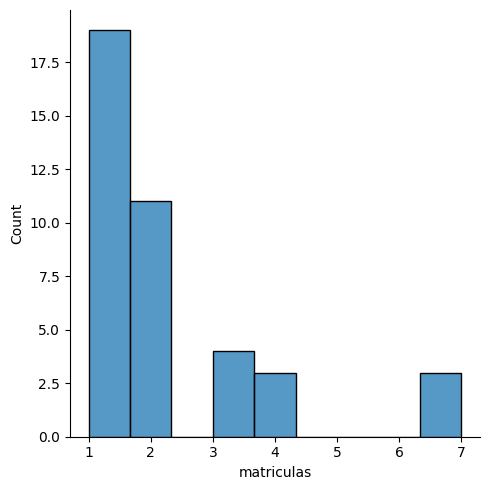

In [187]:
sns.displot(nomes.matriculas)

In [188]:
nomes.matriculas.value_counts()

1    19
2    11
3     4
7     3
4     3
Name: matriculas, dtype: int64

### Selecionando Cursos

In [189]:
nomes.head()

,nome,id_aluno,dominios,email,matriculas
0,MARIA,7,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br,1
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
3,ANTONIA,39,@servicodoemail.com,antonia@servicodoemail.com,1
4,ADRIANA,6,@dominiodoemmail.com.br,adriana@dominiodoemmail.com.br,1


In [190]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [191]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns= ['id_aluno', 'id_curso'])


In [193]:
matriculas.head()

,id_aluno,id_curso
0,7,10
1,11,10
2,11,16
3,13,11
4,13,3


In [203]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns= {'id_aluno': 'quantidade_alunos'})
matriculas_por_curso.head(2)

,quantidade_alunos,nome_do_curso
id_curso,,
1,7,Lógica de programação
3,4,C# para Web


In [199]:
nomes.head(2)

,nome,id_aluno,dominios,email,matriculas
0,MARIA,7,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br,1
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,2


In [200]:
cursos.head(2)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web


In [201]:
matriculas.head(2)

,id_aluno,id_curso
0,7,10
1,11,10


### Exportando em arquivos

In [214]:
matriculas_por_curso

,quantidade_alunos,nome_do_curso
id_curso,,
1,7,Lógica de programação
3,4,C# para Web
4,8,Ruby on Rails
5,4,Cursos de Python
6,3,PHP com MySql
7,4,.NET para web
8,4,Novas integrações com Java
9,1,TDD com Java
10,9,Código limpo com C#


In [215]:
matriculas_por_curso.to_csv('dados/matriculas_por_curso.csv', index= False)

In [216]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_alunos":{"1":7,"3":4,"4":8,"5":4,"6":3,"7":4,"8":4,"9":1,"10":9,"11":7,"12":4,"13":3,"14":2,"15":1,"16":6,"18":8,"19":7,"20":4},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [223]:
matriculas_por_curso.to_json('dados/matriculas_por_curso.json')

In [217]:
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>7</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>8</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>4</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>4</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>4</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>9</td>
      <td>Có

In [222]:
matriculas_por_curso.to_html('dados/matriculas_por_curso.html')

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Criando Banco de Dados SQL </h1>

In [237]:
# adicionando o método inspect
from sqlalchemy import create_engine, MetaData, Table, inspect

In [238]:
engine = create_engine('sqlite:///:memory:')
engine
# type(engine)

Engine(sqlite:///:memory:)

In [239]:
matriculas_por_curso.to_sql('matriculas', engine)

18

In [240]:
inspector = inspect(engine)  # criando um Inspector object
print(inspector.get_table_names())  # Exibindo as tabelas com o inspecto


['matriculas']


### Buscando do Banco SQL

In [249]:
matriculas_por_curso.columns

Index(['quantidade_alunos', 'nome_do_curso'], dtype='object')

In [257]:
query = 'select * from matriculas where quantidade_alunos < 6'

In [258]:
pd.read_sql(query, engine)

,id_curso,quantidade_alunos,nome_do_curso
0,3,4,C# para Web
1,5,4,Cursos de Python
2,6,3,PHP com MySql
3,7,4,.NET para web
4,8,4,Novas integrações com Java
5,9,1,TDD com Java
6,12,4,Hardware básico
7,13,3,Persistência com .NET
8,14,2,Desenvolvendo jogos
9,15,1,Análise de dados


In [259]:
pd.read_sql_table('matriculas', engine, columns= ['nome_do_curso', 'quantidade_alunos'])

,nome_do_curso,quantidade_alunos
0,Lógica de programação,7
1,C# para Web,4
2,Ruby on Rails,8
3,Cursos de Python,4
4,PHP com MySql,3
5,.NET para web,4
6,Novas integrações com Java,4
7,TDD com Java,1
8,Código limpo com C#,9
9,Preparatório para certificação Java,7


In [260]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns= ['nome_do_curso', 'quantidade_alunos'])

In [261]:
muitas_matriculas

,nome_do_curso,quantidade_alunos
0,Lógica de programação,7
1,C# para Web,4
2,Ruby on Rails,8
3,Cursos de Python,4
4,PHP com MySql,3
5,.NET para web,4
6,Novas integrações com Java,4
7,TDD com Java,1
8,Código limpo com C#,9
9,Preparatório para certificação Java,7


In [256]:
muitas_matriculas.query('quantidade_alunos > 6')

,nome_do_curso,quantidade_alunos
0,Lógica de programação,7
2,Ruby on Rails,8
8,Código limpo com C#,9
9,Preparatório para certificação Java,7
15,Programação funcional,8
16,Boas práticas em Java,7


### Escrevendo no banco

In [262]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

18

In [263]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\ricar\AppData\Local\Temp\ipykernel_7164\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Nomes dos Alunos da Próxima Turma </h1>

### Lembrando os dataFrames

In [265]:
matriculas_por_curso

,quantidade_alunos,nome_do_curso
id_curso,,
1,7,Lógica de programação
3,4,C# para Web
4,8,Ruby on Rails
5,4,Cursos de Python
6,3,PHP com MySql
7,4,.NET para web
8,4,Novas integrações com Java
9,1,TDD com Java
10,9,Código limpo com C#


In [266]:
matriculas

,id_aluno,id_curso
0,7,10
1,11,10
2,11,16
3,13,11
4,13,3
...,...,...
81,20,1
82,18,10
83,35,20
84,29,8


In [269]:
id_curso = 16   # curso escolhido (Estatística básica)
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
2,11,16
9,24,16
11,2,16
32,17,16
38,26,16
45,36,16


In [270]:
nomes.head()

,nome,id_aluno,dominios,email,matriculas
0,MARIA,7,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br,1
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
3,ANTONIA,39,@servicodoemail.com,antonia@servicodoemail.com,1
4,ADRIANA,6,@dominiodoemmail.com.br,adriana@dominiodoemmail.com.br,1


In [271]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominios,email,matriculas
id_aluno,,,,,
11,16,ANA,@servicodoemail.com,ana@servicodoemail.com,2
24,16,MARCIA,@servicodoemail.com,marcia@servicodoemail.com,2
2,16,FERNANDA,@dominiodoemmail.com.br,fernanda@dominiodoemmail.com.br,3
17,16,MARIANA,@dominiodoemmail.com.br,mariana@dominiodoemmail.com.br,1
26,16,JOSE,@servicodoemail.com,jose@servicodoemail.com,7
36,16,FRANCISCO,@servicodoemail.com,francisco@servicodoemail.com,1


In [274]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
11          ANA
24       MARCIA
2      FERNANDA
17      MARIANA
26         JOSE
36    FRANCISCO
Name: nome, dtype: object

In [277]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
11,ANA
24,MARCIA
2,FERNANDA
17,MARIANA
26,JOSE
36,FRANCISCO


In [285]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [286]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [289]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [291]:
proxima_turma = proxima_turma.rename(columns={'nome': f'Alunos do Curso de {nome_curso}'})

In [292]:
proxima_turma

,Alunos do Curso de Estatística básica
id_aluno,
11,ANA
24,MARCIA
2,FERNANDA
17,MARIANA
26,JOSE
36,FRANCISCO


### Exportando Excel

In [294]:
proxima_turma.to_excel('dados/proxima_turma.xlsx', index= False)

In [295]:
pd.read_excel('dados/proxima_turma.xlsx')

,Alunos do Curso de Estatística básica
0,ANA
1,MARCIA
2,FERNANDA
3,MARIANA
4,JOSE
5,FRANCISCO
